In [245]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import os
import random

In [251]:
file_path = os.path.join("..", "Resources", "housingCensus.csv")
housingCensusDF = pd.read_csv(file_path)
print(f"Data Shape: {housingCensusDF.shape}")
housingCensusDF.head()

Data Shape: (427, 34)


,Geo_ID,Geographic Area Name,Year,Estimate HOUSING OCCUPANCY Total housing units,Estimate HOUSING OCCUPANCY Occupied housing units,Estimate HOUSING OCCUPANCY Vacant housing units,Estimate YEAR STRUCTURE BUILT Total housing units,Estimate YEAR STRUCTURE BUILT Built 2005 or later,Estimate YEAR STRUCTURE BUILT Built 2000 to 2004,Estimate YEAR STRUCTURE BUILT Built 1990 to 1999,...,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars),State
0,1,United States,2012,132452249.0,115969540.0,16482709.0,132452249.0,1199560.0,19799406.0,18348209.0,...,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0,Texas
1,1000,"Abilene city, Texas",2012,48583.0,42756.0,5827.0,48583.0,669.0,4371.0,3133.0,...,4654,7085,4910,3475,1338,645,71,0,95300.0,Texas
2,1924,"Allen city, Texas",2012,28802.0,28574.0,228.0,28802.0,1026.0,12728.0,7679.0,...,80,425,3321,6738,5524,3323,1345,286,199600.0,Texas
3,3000,"Amarillo city, Texas",2012,80816.0,74018.0,6798.0,80816.0,669.0,9818.0,6229.0,...,5144,13317,13526,6681,4093,1670,571,102,115000.0,Texas
4,4000,"Arlington city, Texas",2012,147340.0,132941.0,14399.0,147340.0,755.0,19901.0,28780.0,...,3302,16210,26830,13884,9746,2086,860,79,129100.0,Texas


In [247]:
file_path = os.path.join("..", "Resources", "Crime_Merged.csv")
crimeDF = pd.read_csv(file_path)
print(f"Data Shape: {crimeDF.shape}")
crimeDF.head()

Data Shape: (70, 13)


,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny Theft,Motor/Vehicle Theft,Arson
0,Baytown,2012,74420,247,5,15,97,130,3684,939,2438,307,23
1,Friendswood,2012,36965,15,0,4,4,7,353,66,274,13,0
2,Galveston,2012,49170,296,2,37,118,139,2469,517,1792,160,12
3,Houston,2012,2177273,21610,217,665,9385,11343,107678,26630,67978,13070,754
4,La Porte,2012,35054,61,1,25,8,27,604,127,439,38,8


In [252]:
housingPriceRangeDF= pd.DataFrame(housingCensusDF[['Geo_ID', 'Year', 'Geographic Area Name', 'Estimate VALUE Less than $50,000','Estimate VALUE $50,000 to $99,999','Estimate VALUE $100,000 to $149,999',
                   'Estimate VALUE $150,000 to $199,999','Estimate VALUE $200,000 to $299,999','Estimate VALUE $300,000 to $499,999','Estimate VALUE $500,000 to $999,999',
                   'Estimate VALUE $1,000,000 or more','Estimate VALUE Median (dollars)']])

housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars)
0,1,2012,United States,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0
1,1000,2012,"Abilene city, Texas",4654,7085,4910,3475,1338,645,71,0,95300.0
2,1924,2012,"Allen city, Texas",80,425,3321,6738,5524,3323,1345,286,199600.0
3,3000,2012,"Amarillo city, Texas",5144,13317,13526,6681,4093,1670,571,102,115000.0
4,4000,2012,"Arlington city, Texas",3302,16210,26830,13884,9746,2086,860,79,129100.0


In [253]:
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace("city, Texas","", regex=True)

housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace(", Texas","", regex=True)
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].str.strip()

housingPriceRangeDF['Estimate VALUE Less than $150,000'] = housingPriceRangeDF['Estimate VALUE Less than $50,000'] + housingPriceRangeDF['Estimate VALUE $50,000 to $99,999'] + housingPriceRangeDF['Estimate VALUE $100,000 to $149,999']
housingPriceRangeDF['Estimate VALUE $150,000 to $299,999'] =  housingPriceRangeDF['Estimate VALUE $150,000 to $199,999'] + housingPriceRangeDF['Estimate VALUE $200,000 to $299,999']
housingPriceRangeDF['Estimate VALUE Between 0 and $300,000'] = housingPriceRangeDF['Estimate VALUE Less than $150,000'] + housingPriceRangeDF['Estimate VALUE $150,000 to $299,999']
 
housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars),"Estimate VALUE Less than $150,000","Estimate VALUE $150,000 to $299,999","Estimate VALUE Between 0 and $300,000"
0,1,2012,United States,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0,31129978,24763536,55893514
1,1000,2012,Abilene,4654,7085,4910,3475,1338,645,71,0,95300.0,16649,4813,21462
2,1924,2012,Allen,80,425,3321,6738,5524,3323,1345,286,199600.0,3826,12262,16088
3,3000,2012,Amarillo,5144,13317,13526,6681,4093,1670,571,102,115000.0,31987,10774,42761
4,4000,2012,Arlington,3302,16210,26830,13884,9746,2086,860,79,129100.0,46342,23630,69972


In [254]:
cityNames = [70808 ,41980, 16432,35000, 48804, 7000, 56000, 56348, 72656, 77546, 77550, 77551 ]

housingPriceHoustonDF = housingPriceRangeDF[housingPriceRangeDF['Geo_ID'].isin(cityNames)]


housingPriceHoustonDF = housingPriceHoustonDF.rename(columns={'Geographic Area Name': 'City'})

housingPriceHoustonDF.to_csv('houstonHousing.csv', index = False)

housingPriceHoustonDF = housingPriceHoustonDF.reset_index(drop = True)

print(housingPriceHoustonDF)
#

    Geo_ID  Year           City  Estimate VALUE Less than $50,000  \
0     7000  2012       Beaumont                              5510   
1    35000  2012        Houston                             25598   
2    41980  2012    League City                               892   
3    48804  2012  Missouri City                               248   
4    56000  2012       Pasadena                              3347   
..     ...   ...            ...                               ...   
77   77550  2016      Galveston                              2624   
78   77550  2017      Galveston                              2733   
79   77551  2017       La Porte                              2935   
80   77550  2018      Galveston                              2876   
81   77551  2018       La Porte                              2952   

    Estimate VALUE $50,000 to $99,999  Estimate VALUE $100,000 to $149,999  \
0                                7369                                 4731   
1              

In [256]:
# crime data filtered

crimeDataFilteredDF = crimeDF[['City', 'Year' ,'Population', 'Violent Crime', 'Property Crime']]
 
mergedDF = pd.merge(crimeDF, housingPriceHoustonDF, on = ['City', 'Year'], how='right' )

print (mergedDF)

             City  Year  Population  Violent Crime  Murder   Rape  Robbery  \
0        Beaumont  2012         NaN            NaN     NaN    NaN      NaN   
1         Houston  2012   2177273.0        21610.0   217.0  665.0   9385.0   
2     League City  2012     86127.0           79.0     0.0   16.0     28.0   
3   Missouri City  2012     70819.0           86.0     0.0    8.0     34.0   
4        Pasadena  2012    154562.0          622.0     8.0   52.0    147.0   
..            ...   ...         ...            ...     ...    ...      ...   
77      Galveston  2016     50667.0          244.0     6.0   60.0     77.0   
78      Galveston  2017     51021.0          257.0     2.0   63.0     82.0   
79       La Porte  2017     35293.0          103.0     0.0   20.0     16.0   
80      Galveston  2018     51021.0          257.0     2.0   63.0     82.0   
81       La Porte  2018     35293.0          103.0     0.0   20.0     16.0   

    Aggravated Assault  Property Crime  Burglary  ...  \
0     

In [288]:
randomSample = []

 
lowRangeRandomSample = random.sample(range(25000, 100000), 200) 
randomSample.extend(lowRangeRandomSample)

mediumRangeRandomSample = random.sample(range(100000, 200000), 300) 
randomSample.extend(mediumRangeRandomSample)

#count = int(mergedDF['Estimate VALUE $100,000 to $149,999'].mean()/100)
highRangeRandomSample = random.sample(range(200000, 300000), 300)  
randomSample.extend(highRangeRandomSample)



# build x values

quantile = mergedDF['Estimate VALUE Between 0 and $300,000'].quantile([0,1])

#sortDF = mergedDF.sort_values(by=['Estimate VALUE Less than $150,000'], ascending=False).reset_index(drop = True)
#print(sortDF)

maxValueRow = mergedDF[mergedDF['Estimate VALUE Between 0 and $300,000'] == quantile[1]]
 
minValueRows = mergedDF[mergedDF['Estimate VALUE Between 0 and $300,000'] <= quantile[0]] 

minValueRow = minValueRows.iloc[0]

print (minValueRow)

highCrimeCount = int(maxValueRow['Violent Crime']  + maxValueRow['Property Crime'])
lowCrimeCount = int(minValueRow['Violent Crime']  + minValueRow['Property Crime'])


crimeRandomSample = random.sample(range(lowCrimeCount, highCrimeCount), len(randomSample))  

# plot  the price range as Y axis, crime on X Axis

y_valuesdf = pd.DataFrame(randomSample ) * 1.0
x_valuesdf = (pd.DataFrame(crimeRandomSample ) ) / 100

x_values = x_valuesdf[0]
y_values = y_valuesdf[0]

 

City                                     Galveston
Year                                          2014
Population                                   48961
Violent Crime                                  256
Murder                                           6
Rape                                            51
Robbery                                        105
Aggravated Assault                              94
Property Crime                                2054
Burglary                                       414
Larceny Theft                                 1447
Motor/Vehicle Theft                            193
Arson                                           17
Geo_ID                                       77550
Estimate VALUE Less than $50,000               174
Estimate VALUE $50,000 to $99,999              117
Estimate VALUE $100,000 to $149,999            112
Estimate VALUE $150,000 to $199,999            192
Estimate VALUE $200,000 to $299,999             29
Estimate VALUE $300,000 to $499

The r-value is: 0.0035793076723861644


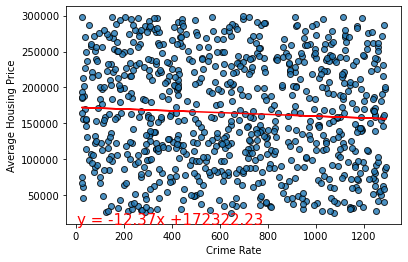

In [289]:

# y_values = mergedDF['Estimate VALUE Between 0 and $300,000'] 

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8,marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.ylim(10000)
plt.text(5,10000,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [214]:

#build y values

randomSample = []

 
lowRangeRandomSample = random.sample(range(25000, 50000), 300) 
randomSample.extend(lowRangeRandomSample)

mediumRangeRandomSample = random.sample(range(50000, 100000), 300) 
randomSample.extend(mediumRangeRandomSample)

#count = int(mergedDF['Estimate VALUE $100,000 to $149,999'].mean()/100)
highRangeRandomSample = random.sample(range(100000, 150000), 300)  
randomSample.extend(highRangeRandomSample)


# build x values

quantile = mergedDF['Estimate VALUE $150,000 to $299,999'].quantile([0,1])

#sortDF = mergedDF.sort_values(by=['Estimate VALUE Less than $150,000'], ascending=False).reset_index(drop = True)
#print(sortDF)

maxValueRow = mergedDF[mergedDF['Estimate VALUE $150,000 to $299,999'] == quantile[1]]
 
minValueRows = mergedDF[mergedDF['Estimate VALUE $150,000 to $299,999'] <= quantile[0]] 

minValueRow = minValueRows.iloc[0]

print (minValueRow)

highCrimeCount = int(maxValueRow['Violent Crime']  + maxValueRow['Property Crime'])
lowCrimeCount = int(minValueRow['Violent Crime']  + minValueRow['Property Crime'])


crimeRandomSample = random.sample(range(lowCrimeCount, highCrimeCount), len(randomSample))  

# plot  the price range as Y axis, crime on X Axis

y_valuesdf = pd.DataFrame(randomSample ) * 1.0
x_valuesdf = pd.DataFrame(crimeRandomSample ) /100.0  

x_values = x_valuesdf[0]
y_values = y_valuesdf[0]

 

City                                   Galveston
Year                                        2014
Population                                 48961
Violent Crime                                256
Murder                                         6
Rape                                          51
Robbery                                      105
Aggravated Assault                            94
Property Crime                              2054
Burglary                                     414
Larceny Theft                               1447
Motor/Vehicle Theft                          193
Arson                                         17
Geo_ID                                     77550
Estimate VALUE Less than $50,000             174
Estimate VALUE $50,000 to $99,999            117
Estimate VALUE $100,000 to $149,999          112
Estimate VALUE $150,000 to $199,999          192
Estimate VALUE $200,000 to $299,999           29
Estimate VALUE $300,000 to $499,999           10
Estimate VALUE $500,

The r-value is: 0.004352536546101389


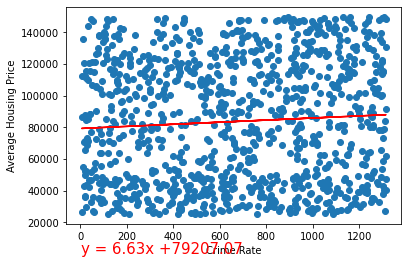

In [205]:



# y_values = mergedDF['Estimate VALUE Less than $150,000'] 

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.text(5,25,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0003153746134003006


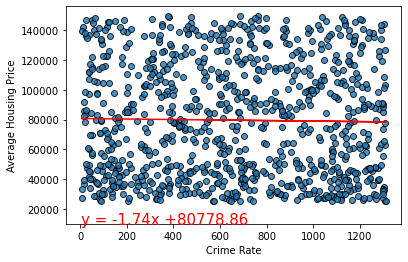

In [213]:



# y_values = mergedDF['Estimate VALUE Less than $150,000'] 

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8,marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.ylim(10000)
plt.text(5,10000,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [290]:

#build y values

randomSample = []

 
lowRangeRandomSample = random.sample(range(25000, 50000), 300) 
randomSample.extend(lowRangeRandomSample)

mediumRangeRandomSample = random.sample(range(50000, 100000), 300) 
randomSample.extend(mediumRangeRandomSample)

#count = int(mergedDF['Estimate VALUE $100,000 to $149,999'].mean()/100)
highRangeRandomSample = random.sample(range(100000, 150000), 300)  
randomSample.extend(highRangeRandomSample)


# build x values

quantile = mergedDF['Estimate VALUE Less than $150,000'].quantile([0,1])

#sortDF = mergedDF.sort_values(by=['Estimate VALUE Less than $150,000'], ascending=False).reset_index(drop = True)
#print(sortDF)

maxValueRow = mergedDF[mergedDF['Estimate VALUE Less than $150,000'] == quantile[1]]
 
minValueRows = mergedDF[mergedDF['Estimate VALUE Less than $150,000'] <= quantile[0]] 

minValueRow = minValueRows.iloc[0]

 

highCrimeCount = int(maxValueRow['Violent Crime']  + maxValueRow['Property Crime'])
lowCrimeCount = int(minValueRow['Violent Crime']  + minValueRow['Property Crime'])


crimeRandomSample = random.sample(range(lowCrimeCount, highCrimeCount), len(randomSample))  

# plot  the price range as Y axis, crime on X Axis

y_valuesdf = pd.DataFrame(randomSample ) * 1.0
x_valuesdf = (pd.DataFrame(crimeRandomSample )) /100.0  

x_values = x_valuesdf[0]
y_values = y_valuesdf[0]

The r-value is: 0.0021125797131376777


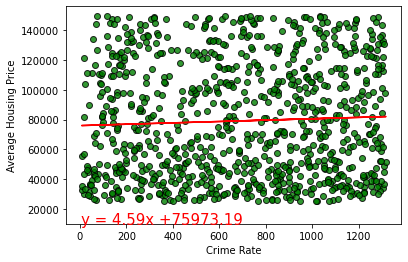

In [229]:

# y_values = mergedDF['Estimate VALUE Less than $150,000'] 

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ="green", marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.ylim(10000)
plt.text(5,10000,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [291]:

#build y values

randomSample = []

 
lowRangeRandomSample = random.sample(range(300000, 500000), 1000) 
randomSample.extend(lowRangeRandomSample)
 

# build x values

quantile = mergedDF['Estimate VALUE $300,000 to $499,999'].quantile([0,1])

#sortDF = mergedDF.sort_values(by=['Estimate VALUE Less than $150,000'], ascending=False).reset_index(drop = True)
#print(sortDF)

maxValueRow = mergedDF[mergedDF['Estimate VALUE $300,000 to $499,999'] == quantile[1]]
 
minValueRow = mergedDF[mergedDF['Estimate VALUE $300,000 to $499,999'] == quantile[0]] 

#minValueRow = minValueRows.iloc[0]

 

highCrimeCount = int(maxValueRow['Violent Crime']  + maxValueRow['Property Crime'])
lowCrimeCount = int(minValueRow['Violent Crime']  + minValueRow['Property Crime'])


crimeRandomSample = random.sample(range(lowCrimeCount, highCrimeCount), len(randomSample))  

# plot  the price range as Y axis, crime on X Axis

y_valuesdf = pd.DataFrame(randomSample ) * 1.0
x_valuesdf = pd.DataFrame(crimeRandomSample ) /100.0  

x_values = x_valuesdf[0]
y_values = y_valuesdf[0]

The r-value is: 2.280372804357248e-07


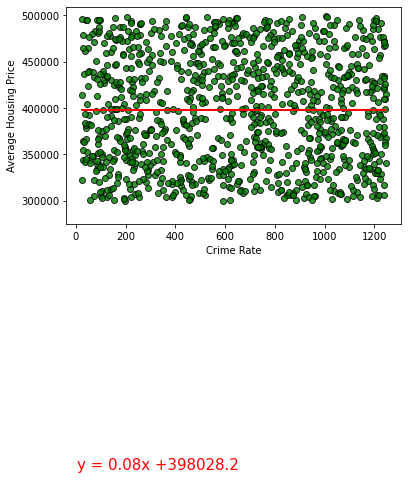

In [292]:

# y_values = mergedDF['Estimate VALUE Less than $150,000'] 

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ="green", marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.ylim(275000)
plt.text(5,10000,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()